In [58]:
# Read Fashion MNIST dataset

import util_mnist_reader as mnist_reader
import math
import matplotlib.pyplot as plt 
import numpy as np

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .
digits = 10
examples = y_train.shape[0]

y = y_train.reshape(1, examples)

#np.eye gives you an array with all 0s and a 1 down the main diagonal
#but if we index it with y(the correct label) as int it will index the 1
#at the correction location instead of the main diagonal
Y_new = np.eye(digits)[y.astype('int')]
Y_new = Y_new.T.reshape(digits, examples)

m = 60000

X_train, X_test = X_train[:m].T, X_test[m:].T
y_train, y_test = Y_new[:,:m], Y_new[:,m:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_guess):

    total_loss = np.sum(np.multiply(Y, np.log(Y_guess)))
    loss = -(1/Y.shape[1]) * total_loss

    return loss

(784, 60000)
(10, 60000)
(784, 0)
(10, 0)


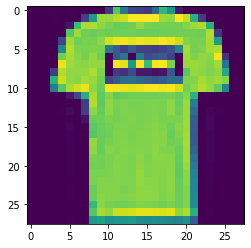

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
#So we now have our data partitioned between training and testing
#X matrix is the 60,000 examples for training and 10,000 for testing
#Pixel value is 0-255 depending on darkness
#Y matrix has the classification for each item ranging from 0-9 and labels are 1-10 so y+1 is the label
#divide all values by 255 to get them on a 0-1 sacle
X_train = X_train /255

plt.imshow(X_train[:,1].reshape(28,28))
plt.show()
print(y_train[:,1])



In [63]:
iterations    = 500
learning_rate = .1

#initialize weights and bias
W1 = np.random.randn(64, X_train.shape[0])
b1 = np.zeros((64, 1))
W2 = np.random.randn(digits, 64)
b2 = np.zeros((digits, 1))

for i in range(iterations):
    
    #make a prediction
    Z1 = np.matmul(W1,X_train) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    #compute loss by comparing predictions to actual answers
    loss = compute_loss(y_train, A2)       

    #update weights and bias
    dZ2 = A2-y_train
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X_train.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "loss: ", loss)

#make a prediction
Z1 = np.matmul(W1,X_train) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2,A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

#find out what our guess is by finding max probable answer is
answers = A2.T
real_answers = y_train.T
final_guess = []
final_answer = []

cur_max = answers[0][0]
cur_index = 0
for i in range(len(answers)):

    cur_max = answers[i][0]
    cur_index = 0  
    for j in range(len(answers[1])):
        if answers[i][j] > cur_max:
            cur_max = answers[i][j]
            cur_index = j
        if real_answers[i][j] == 1:
            final_answer.append(j)
    final_guess.append(cur_index)

number_correct = 0
number_wrong = 0
for i in range(len(final_guess)):
    if final_guess[i] == final_answer[i]:
        number_correct += 1
    else:
        number_wrong += 1
total_number = number_correct + number_wrong
accuracy = number_correct / total_number
print("Number Correct: ", number_correct, " Number Wrong: ", number_wrong, " Accuracy: ",accuracy)
print("Final loss:", loss)

Epoch 0 loss:  9.340384966728427
Epoch 100 loss:  1.9361937817422876
Epoch 200 loss:  1.4004166063303842
Epoch 300 loss:  1.1773091450253343
Epoch 400 loss:  1.0524416568083896
Number Correct:  39870  Number Wrong:  20130  Accuracy:  0.6645
Final loss: 0.9744780451917289


In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#mult layer hidden net utilizing keras

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train = (X_train / 255) - 0.5
X_test  = (X_test  / 255) - 0.5

X_train = X_train.reshape((-1,784))
X_test = X_test.reshape((-1,784))

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X_train,
    to_categorical(y_train),
    epochs=25,
    batch_size=128,
)
print("")
model.evaluate(
    X_test,
    to_categorical(y_test),
)

Epoch 1/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.5759 - acc: 0.7926
Epoch 2/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.3988 - acc: 0.8552
Epoch 3/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.3595 - acc: 0.8681
Epoch 4/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.3363 - acc: 0.8756
Epoch 5/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.3153 - acc: 0.8827
Epoch 6/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.3038 - acc: 0.8867
Epoch 7/25
60000/60000 [==============================] - 4s 59us/step - loss: 0.2910 - acc: 0.8910
Epoch 8/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.2804 - acc: 0.8956
Epoch 9/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.2737 - acc: 0.8989
Epoch 10/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.2645 - acc: 0.9007

[0.3695673335015774, 0.8807]

In [66]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#convulationary keras net

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train = (X_train / 255) - 0.5
X_test  = (X_test  / 255) - 0.5

X_train = np.reshape(X_train, (60000,28,28))
X_test = np.reshape(X_test, (10000,28,28))

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

num_filters = 12
filter_size = 4
pool_size   = 2
batch_size  = 128
epochs      = 25

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X_train,
    to_categorical(y_train),
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, to_categorical(y_test)),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 38s 628us/step - loss: 0.5984 - acc: 0.7951 - val_loss: 0.4694 - val_acc: 0.8315
Epoch 2/25
60000/60000 [==============================] - 40s 675us/step - loss: 0.4212 - acc: 0.8527 - val_loss: 0.4178 - val_acc: 0.8538
Epoch 3/25
60000/60000 [==============================] - 41s 679us/step - loss: 0.3873 - acc: 0.8650 - val_loss: 0.4018 - val_acc: 0.8567
Epoch 4/25
60000/60000 [==============================] - 41s 676us/step - loss: 0.3644 - acc: 0.8734 - val_loss: 0.3838 - val_acc: 0.8665
Epoch 5/25
60000/60000 [==============================] - 41s 680us/step - loss: 0.3533 - acc: 0.8759 - val_loss: 0.3733 - val_acc: 0.8698
Epoch 6/25
60000/60000 [==============================] - 41s 681us/step - loss: 0.3381 - acc: 0.8815 - val_loss: 0.3580 - val_acc: 0.8756
Epoch 7/25
60000/60000 [==============================] - 41s 683us/step - loss: 0.3283 - acc: 0.8855 - val_loss: 0.